In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [3]:
mvps = pd.read_csv('files/player_analysis_files/mvps.csv')
players = pd.read_csv('files/player_analysis_files/player_stats.csv')

In [4]:
record = pd.read_csv('files/player_analysis_files/team_record.csv')

In the MVP file, get rid of the useless/already-known columns(ie, TRB, AST, BLK, FG%, 3p%, FT%, G, MP)

In [5]:
mvps = mvps[['Player', 'Pts Won', 'Pts Max', 'Share', 'Year']]
mvps

,Player,Pts Won,Pts Max,Share,Year
0,Michael Jordan,891.0,960,0.928,1991
1,Magic Johnson,497.0,960,0.518,1991
2,David Robinson,476.0,960,0.496,1991
3,Charles Barkley,222.0,960,0.231,1991
4,Karl Malone,142.0,960,0.148,1991
...,...,...,...,...,...
481,Stephen Curry,4.0,1000,0.004,2022
482,Chris Paul,2.0,1000,0.002,2022
483,DeMar DeRozan,1.0,1000,0.001,2022
484,Kevin Durant,1.0,1000,0.001,2022


For the players.csv file, get rid of unnecessary data as well as the rows in which the scrapping couldn't get rid of(ie player, team, etc)

In [6]:
del players['Unnamed: 0']
del players['Rk']

KeyError: 'Rk'

Get rid of players who aren't actually players(web scrapping didn't get rid of certain rows), and remove unneccessary symbols in the players names in order to merge correctly with the 'mvps' dataframe. Also get rid of players who only played for multiple teams in one season(only take the players with TOT)

In [7]:
players = players[players['Player'] != 'Player']
players['Player'] = players['Player'].apply(lambda x: x.strip('*'))
players.head(30)

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,PTS,Year,Pts Won,Pts Max,Share,Team,Wins,Losses,W/L%,Game Score
0,A.C. Green,PF,27,LAL,82,21,26.4,3.1,6.6,0.476,...,9.1,1991,0.0,0.0,0.000,Los Angeles Lakers,58,24,0.707,8.79
1,Byron Scott,SG,29,LAL,82,82,32.1,6.1,12.8,0.477,...,14.5,1991,0.0,0.0,0.000,Los Angeles Lakers,58,24,0.707,10.55
2,Elden Campbell,PF,22,LAL,52,0,7.3,1.1,2.4,0.455,...,2.8,1991,0.0,0.0,0.000,Los Angeles Lakers,58,24,0.707,2.54
3,Irving Thomas,PF,25,LAL,26,0,4.2,0.7,1.9,0.340,...,1.8,1991,0.0,0.0,0.000,Los Angeles Lakers,58,24,0.707,1.05
4,James Worthy,SF,29,LAL,78,74,38.6,9.2,18.7,0.492,...,21.4,1991,0.0,0.0,0.000,Los Angeles Lakers,58,24,0.707,16.04
5,Larry Drew,PG,32,LAL,48,2,10.3,1.1,2.6,0.432,...,2.9,1991,0.0,0.0,0.000,Los Angeles Lakers,58,24,0.707,2.54
6,Magic Johnson,PG,31,LAL,79,79,37.1,5.9,12.4,0.477,...,19.4,1991,497.0,960.0,0.518,Los Angeles Lakers,58,24,0.707,21.38
7,Mychal Thompson,C,36,LAL,72,4,15.0,1.6,3.2,0.496,...,4.0,1991,0.0,0.0,0.000,Los Angeles Lakers,58,24,0.707,3.23
8,Sam Perkins,PF,29,LAL,73,66,34.3,5.0,10.2,0.495,...,13.5,1991,0.0,0.0,0.000,Los Angeles Lakers,58,24,0.707,11.74
9,Terry Teagle,SG,30,LAL,82,0,18.3,4.1,9.2,0.443,...,9.9,1991,0.0,0.0,0.000,Los Angeles Lakers,58,24,0.707,5.69


Create a function that takes in a dataframe. If there is more than one line in the dataframe, only take the top/the line that contains 'TOT' in the team name

In [11]:
def total_stats(df):
    if df.shape[0] == 1:
        return df
    else:
        row = df[df.get('Tm') == 'TOT']
        row['Tm'] = df.iloc[-1,:]['Tm']
        return row
    
players = players.groupby(['Player', 'Year']).apply(total_stats)

/var/folders/lz/89b0m93557x4pjgtj7v1dcpc0000gn/T/ipykernel_45314/1899576113.py:9: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  players = players.groupby(['Player', 'Year']).apply(total_stats)


In [12]:
players.index = players.index.droplevel()
players.index = players.index.droplevel()

ValueError: Cannot remove 1 levels from an index with 1 levels: at least one level must be left.

In [13]:
players

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,PTS,Year,Pts Won,Pts Max,Share,Team,Wins,Losses,W/L%,Game Score
0,A.C. Green,PF,27,LAL,82,21,26.4,3.1,6.6,0.476,...,9.1,1991,0.0,0.0,0.0,Los Angeles Lakers,58,24,0.707,8.79
1,Byron Scott,SG,29,LAL,82,82,32.1,6.1,12.8,0.477,...,14.5,1991,0.0,0.0,0.0,Los Angeles Lakers,58,24,0.707,10.55
2,Elden Campbell,PF,22,LAL,52,0,7.3,1.1,2.4,0.455,...,2.8,1991,0.0,0.0,0.0,Los Angeles Lakers,58,24,0.707,2.54
3,Irving Thomas,PF,25,LAL,26,0,4.2,0.7,1.9,0.340,...,1.8,1991,0.0,0.0,0.0,Los Angeles Lakers,58,24,0.707,1.05
4,James Worthy,SF,29,LAL,78,74,38.6,9.2,18.7,0.492,...,21.4,1991,0.0,0.0,0.0,Los Angeles Lakers,58,24,0.707,16.04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14692,Spencer Hawes,PF,28,MIL,54,1,14.8,2.5,5.1,0.484,...,6.2,2017,0.0,0.0,0.0,Milwaukee Bucks,42,40,0.512,5.35
14693,Steve Novak,PF,33,MIL,8,0,2.8,0.3,0.9,0.286,...,0.6,2017,0.0,0.0,0.0,Milwaukee Bucks,42,40,0.512,0.17
14694,Terrence Jones,PF,25,MIL,54,12,23.5,4.3,9.1,0.470,...,10.8,2017,0.0,0.0,0.0,Milwaukee Bucks,42,40,0.512,9.61
14695,Thon Maker,C,19,MIL,57,34,9.9,1.5,3.2,0.459,...,4.0,2017,0.0,0.0,0.0,Milwaukee Bucks,42,40,0.512,3.29


In [14]:
combined = players.merge(mvps, how='outer')

In [15]:
combined[['Pts Won', 'Pts Max', 'Share']] = combined[['Pts Won', 'Pts Max', 'Share']].fillna(0)

Now, let's move on to team record and how it affects the actual player. First, remove the useless columns and the useless rows that were not taken out by the Data Scrapping

In [18]:
del record['Unnamed: 0']
del record['Rk']

In [19]:
record = record[record['Team'] != 'Team']

In [14]:
record['Wins'] = record['Overall'].apply(lambda x: int(x.split('-')[0]))
record['Losses'] = record['Overall'].apply(lambda x: int(x.split('-')[1]))

In [15]:
record['W/L%'] = round(record['Wins']/(record['Wins'] + record['Losses']), 3)

In [17]:
abbreviation = pd.read_csv('files/player_analysis_files/nba_abbreviations.csv')

In [18]:
nicknames = dict()
for i in range(len(abbreviation.abv)):
    nicknames[abbreviation.abv.iloc[i]] = abbreviation.team.iloc[i]

In [19]:
combined['Team'] = combined['Tm'].map(nicknames)

In [20]:
record = record.drop(['Nov', 'Dec', 'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Oct', 'SE', 'NW', 'SW', 'Jul', 'Aug', 'Pre', 'Post', '≤3', '≥10', 'C', 'M', 'P', 'E', 'W', "A"], axis = 1)

A good way to make sure that your merge went through correctly is to have the same amount of rows that were in your original dataframe be the same as after the merge. Make sure there were no errors in your earlier code

In [22]:
stats = combined.merge(record, how = 'outer', on = ['Team', 'Year'])
stats

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,Pts Won,Pts Max,Share,Team,Overall,Home,Road,Wins,Losses,W/L%
0,A.C. Green,PF,27,LAL,82,21,26.4,3.1,6.6,.476,...,0.0,0.0,0.0,Los Angeles Lakers,58-24,33-8,25-16,58,24,0.707
1,Byron Scott,SG,29,LAL,82,82,32.1,6.1,12.8,.477,...,0.0,0.0,0.0,Los Angeles Lakers,58-24,33-8,25-16,58,24,0.707
2,Elden Campbell,PF,22,LAL,52,0,7.3,1.1,2.4,.455,...,0.0,0.0,0.0,Los Angeles Lakers,58-24,33-8,25-16,58,24,0.707
3,Irving Thomas,PF,25,LAL,26,0,4.2,0.7,1.9,.340,...,0.0,0.0,0.0,Los Angeles Lakers,58-24,33-8,25-16,58,24,0.707
4,James Worthy,SF,29,LAL,78,74,38.6,9.2,18.7,.492,...,0.0,0.0,0.0,Los Angeles Lakers,58-24,33-8,25-16,58,24,0.707
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14692,Spencer Hawes,PF,28,MIL,54,1,14.8,2.5,5.1,.484,...,0.0,0.0,0.0,Milwaukee Bucks,42-40,23-18,19-22,42,40,0.512
14693,Steve Novak,PF,33,MIL,8,0,2.8,0.3,0.9,.286,...,0.0,0.0,0.0,Milwaukee Bucks,42-40,23-18,19-22,42,40,0.512
14694,Terrence Jones,PF,25,MIL,54,12,23.5,4.3,9.1,.470,...,0.0,0.0,0.0,Milwaukee Bucks,42-40,23-18,19-22,42,40,0.512
14695,Thon Maker,C,19,MIL,57,34,9.9,1.5,3.2,.459,...,0.0,0.0,0.0,Milwaukee Bucks,42-40,23-18,19-22,42,40,0.512


Another metric that can be important in determining how likely a player is to get MVP shares is Game Score, from John Hollinger. Calculates how well a player did in their games, with 30-40 being a great game and 10 being an average game

In [23]:
def game_score_formula(pts, fg, fga, fta, ft, orb, drb, stl, ast, blk, pf, tov):
    """ 
    A measure of how well a player is doing in a single game.
    Created by John Hollinger to give rough measure of how well each
    singular player did in a game(40 is a great game, 10 is average)
    """
    return (pts) + (0.4 * fg) - (0.7 * fga) + (0.4 * (fta-ft)) + (0.7 * orb) + (0.3 * drb) + stl + (0.7 * ast) + (0.7 * blk) - (0.4 * pf) - tov

In [36]:
df = stats.get(['PTS', 'FG', 'FGA', 'FTA', 'FT', 'ORB', 'DRB', 'STL', 'AST', 'BLK', 'PF', 'TOV'])
stats[['PTS', 'FG', 'FGA', 'FTA', 'FT', 'ORB', 'DRB', 'STL', 'AST', 'BLK', 'PF', 'TOV']] = df.astype(float)

In [58]:
stats['Game Score'] = stats.get(['PTS', 'FG', 'FGA', 'FTA', 'FT', 'ORB', 'DRB', 'STL', 'AST', 'BLK', 'PF', 'TOV']).apply(lambda x: round(game_score_formula(*x), 2), axis = 1)
stats

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,PTS,Year,Pts Won,Pts Max,Share,Team,Wins,Losses,W/L%,Game Score
0,A.C. Green,PF,27,LAL,82,21,26.4,3.1,6.6,0.476,...,9.1,1991,0.0,0.0,0.0,Los Angeles Lakers,58,24,0.707,8.79
1,Byron Scott,SG,29,LAL,82,82,32.1,6.1,12.8,0.477,...,14.5,1991,0.0,0.0,0.0,Los Angeles Lakers,58,24,0.707,10.55
2,Elden Campbell,PF,22,LAL,52,0,7.3,1.1,2.4,0.455,...,2.8,1991,0.0,0.0,0.0,Los Angeles Lakers,58,24,0.707,2.54
3,Irving Thomas,PF,25,LAL,26,0,4.2,0.7,1.9,0.340,...,1.8,1991,0.0,0.0,0.0,Los Angeles Lakers,58,24,0.707,1.05
4,James Worthy,SF,29,LAL,78,74,38.6,9.2,18.7,0.492,...,21.4,1991,0.0,0.0,0.0,Los Angeles Lakers,58,24,0.707,16.04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14692,Spencer Hawes,PF,28,MIL,54,1,14.8,2.5,5.1,0.484,...,6.2,2017,0.0,0.0,0.0,Milwaukee Bucks,42,40,0.512,5.35
14693,Steve Novak,PF,33,MIL,8,0,2.8,0.3,0.9,0.286,...,0.6,2017,0.0,0.0,0.0,Milwaukee Bucks,42,40,0.512,0.17
14694,Terrence Jones,PF,25,MIL,54,12,23.5,4.3,9.1,0.470,...,10.8,2017,0.0,0.0,0.0,Milwaukee Bucks,42,40,0.512,9.61
14695,Thon Maker,C,19,MIL,57,34,9.9,1.5,3.2,0.459,...,4.0,2017,0.0,0.0,0.0,Milwaukee Bucks,42,40,0.512,3.29


Get rid of other columns that aren't necessary for testing the data: Overall, Home, Road

In [45]:
stats = stats.drop(['Overall', 'Home', 'Road'], axis = 1)

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,PTS,Year,Pts Won,Pts Max,Share,Team,Wins,Losses,W/L%,Game Score
0,A.C. Green,PF,27,LAL,82,21,26.4,3.1,6.6,.476,...,9.1,1991,0.0,0.0,0.0,Los Angeles Lakers,58,24,0.707,8.79
1,Byron Scott,SG,29,LAL,82,82,32.1,6.1,12.8,.477,...,14.5,1991,0.0,0.0,0.0,Los Angeles Lakers,58,24,0.707,10.55
2,Elden Campbell,PF,22,LAL,52,0,7.3,1.1,2.4,.455,...,2.8,1991,0.0,0.0,0.0,Los Angeles Lakers,58,24,0.707,2.54
3,Irving Thomas,PF,25,LAL,26,0,4.2,0.7,1.9,.340,...,1.8,1991,0.0,0.0,0.0,Los Angeles Lakers,58,24,0.707,1.05
4,James Worthy,SF,29,LAL,78,74,38.6,9.2,18.7,.492,...,21.4,1991,0.0,0.0,0.0,Los Angeles Lakers,58,24,0.707,16.04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14692,Spencer Hawes,PF,28,MIL,54,1,14.8,2.5,5.1,.484,...,6.2,2017,0.0,0.0,0.0,Milwaukee Bucks,42,40,0.512,5.35
14693,Steve Novak,PF,33,MIL,8,0,2.8,0.3,0.9,.286,...,0.6,2017,0.0,0.0,0.0,Milwaukee Bucks,42,40,0.512,0.17
14694,Terrence Jones,PF,25,MIL,54,12,23.5,4.3,9.1,.470,...,10.8,2017,0.0,0.0,0.0,Milwaukee Bucks,42,40,0.512,9.61
14695,Thon Maker,C,19,MIL,57,34,9.9,1.5,3.2,.459,...,4.0,2017,0.0,0.0,0.0,Milwaukee Bucks,42,40,0.512,3.29


In [53]:
stats = stats.apply(pd.to_numeric, errors = 'ignore')

For a lot of the columns in our dataframe, most seem to be objects stored as strings within pandas. Since that doesn't work well with the model we have, we want to convert the needed ones into numeric mode to work well

In [59]:
stats.to_csv('files/player_analysis_files/player_stats.csv')

In [64]:
best_scorers = stats[stats['G'] > 50].sort_values('PTS', ascending = False).head(20)

<AxesSubplot: xlabel='Player'>

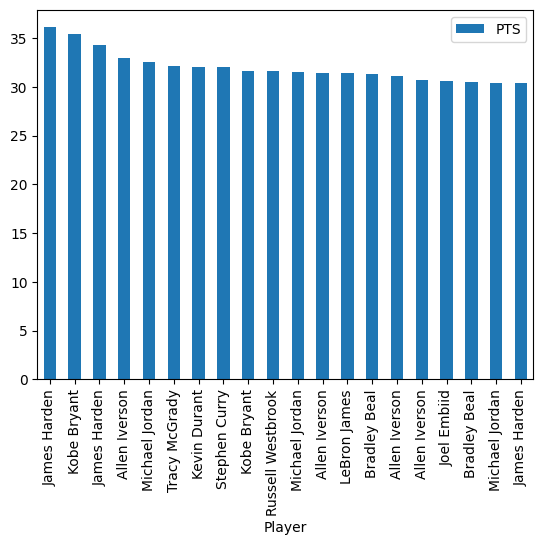

In [65]:
best_scorers.plot.bar('Player', 'PTS')

In [70]:
highest_scorers_per_year = stats.groupby('Year').apply(lambda x: x.sort_values('PTS', ascending = False).head(2))

<AxesSubplot: xlabel='Player'>

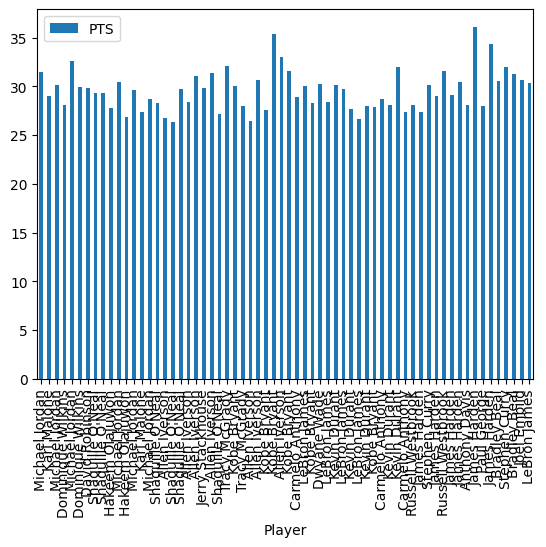

In [71]:
highest_scorers_per_year.plot.bar('Player', 'PTS')

/var/folders/lz/89b0m93557x4pjgtj7v1dcpc0000gn/T/ipykernel_54043/198269374.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  stats.corr()['Share'].plot.bar()


<AxesSubplot: >

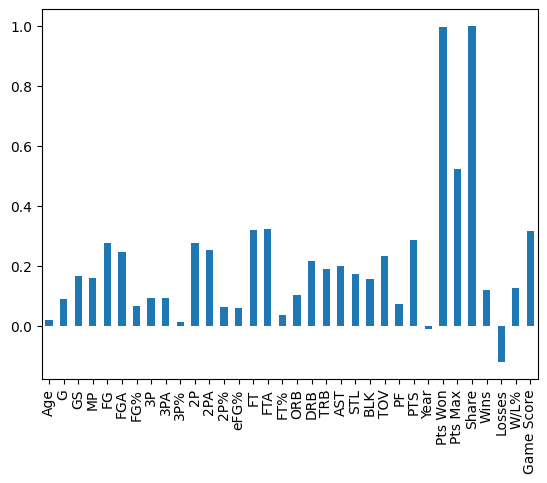

In [73]:
stats.corr()['Share'].plot.bar()